In [ ]:
import pandas as pd
import random
import networkx as nx
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
import plotly.express as px #data visualization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read data common vunerabilities exposures

In [ ]:
cves = pd.read_csv('/content/drive/MyDrive/Project3/cve.csv')
cves.head()

,cve_id,mod_date,pub_date,cvss,cwe_id,cwe_name,summary,access_authentication,access_complexity,access_vector,impact_availability,impact_confidentiality,impact_integrity
0,CVE-2019-16548,11/21/2019 15:15,11/21/2019 15:15,6.8,352,Cross-Site Request Forgery (CSRF),A cross-site request forgery vulnerability in ...,NaN,NaN,NaN,NaN,NaN,NaN
1,CVE-2019-16547,11/21/2019 15:15,11/21/2019 15:15,4.0,732,Incorrect Permission Assignment for Critical ...,Missing permission checks in various API endpo...,NaN,NaN,NaN,NaN,NaN,NaN
2,CVE-2019-16546,11/21/2019 15:15,11/21/2019 15:15,4.3,639,Authorization Bypass Through User-Controlled Key,Jenkins Google Compute Engine Plugin 4.1.1 and...,NaN,NaN,NaN,NaN,NaN,NaN
3,CVE-2013-2092,11/20/2019 21:22,11/20/2019 21:15,4.3,79,Improper Neutralization of Input During Web P...,Cross-site Scripting (XSS) in Dolibarr ERP/CRM...,NaN,NaN,NaN,NaN,NaN,NaN
4,CVE-2013-2091,11/20/2019 20:15,11/20/2019 20:15,7.5,89,Improper Neutralization of Special Elements u...,SQL injection vulnerability in Dolibarr ERP/CR...,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cves.isna().sum()

cve_id                      0
mod_date                    0
pub_date                    0
cvss                        0
cwe_id                      0
cwe_name                    0
summary                     0
access_authentication     884
access_complexity         884
access_vector             884
impact_availability       884
impact_confidentiality    884
impact_integrity          884
dtype: int64

In [ ]:
cves.dropna(how='any', inplace=True)
risk_probability = [cvss / 10 for cvss in cves['cvss']]
cves['risk_probability'] = risk_probability
cves['risk_probability'] = cves['risk_probability'].round(2)
cves.head(10)

,cve_id,mod_date,pub_date,cvss,cwe_id,cwe_name,summary,access_authentication,access_complexity,access_vector,impact_availability,impact_confidentiality,impact_integrity,risk_probability
138,CVE-2019-2211,11/14/2019 21:36,11/13/2019 18:15,7.8,89,Improper Neutralization of Special Elements u...,In createProjectionMapForQuery of TvProvider.j...,NONE,LOW,NETWORK,NONE,COMPLETE,NONE,0.78
139,CVE-2019-2212,11/14/2019 21:30,11/13/2019 18:15,4.9,200,Information Exposure,"In poisson_distribution of random, there is an...",NONE,LOW,LOCAL,NONE,COMPLETE,NONE,0.49
140,CVE-2019-2213,11/14/2019 21:24,11/13/2019 18:15,6.9,416,Use After Free,"In binder_free_transaction of binder.c, there ...",NONE,MEDIUM,LOCAL,COMPLETE,COMPLETE,COMPLETE,0.69
149,CVE-2019-2214,11/14/2019 21:19,11/13/2019 18:15,7.2,269,Improper Privilege Management,"In binder_transaction of binder.c, there is a ...",NONE,LOW,LOCAL,COMPLETE,COMPLETE,COMPLETE,0.72
150,CVE-2019-18793,11/14/2019 21:14,11/13/2019 20:15,4.3,79,Improper Neutralization of Input During Web P...,Parallels Plesk Panel 9.5 allows XSS in target...,NONE,MEDIUM,NETWORK,NONE,NONE,PARTIAL,0.43
151,CVE-2019-18646,11/14/2019 20:57,11/14/2019 15:15,6.5,89,Improper Neutralization of Special Elements u...,The Untangle NG firewall 14.2.0 is vulnerable ...,SINGLE,LOW,NETWORK,PARTIAL,PARTIAL,PARTIAL,0.65
166,CVE-2019-16950,11/14/2019 20:45,11/13/2019 19:15,4.3,79,Improper Neutralization of Input During Web P...,An XSS issue was discovered in Enghouse Web Ch...,NONE,MEDIUM,NETWORK,NONE,NONE,PARTIAL,0.43
167,CVE-2019-18647,11/14/2019 20:37,11/14/2019 15:15,9.0,74,Neutralization of Special Elements in Output ...,The Untangle NG firewall 14.2.0 is vulnerable ...,SINGLE,LOW,NETWORK,COMPLETE,COMPLETE,COMPLETE,0.90
168,CVE-2019-18649,11/14/2019 20:23,11/14/2019 15:15,3.5,79,Improper Neutralization of Input During Web P...,"When logged in as an admin user, the Title inp...",SINGLE,MEDIUM,NETWORK,NONE,NONE,PARTIAL,0.35
169,CVE-2019-18648,11/14/2019 20:19,11/14/2019 15:15,3.5,79,Improper Neutralization of Input During Web P...,"When logged in as an admin user, the Untangle ...",SINGLE,MEDIUM,NETWORK,NONE,NONE,PARTIAL,0.35


In [ ]:
cwes = pd.read_csv('/content/drive/MyDrive/Project3/cwes.csv')
cwes.head()

,_id,cwe_id,cwe_name,description
0,63e76e42e7ec9a5bef1df179,CWE-843,Access of Resource Using Incompatible Type ('T...,The program allocates or initializes a resourc...
1,63e76e42e7ec9a5bef1df17a,CWE-824,Access of Uninitialized Pointer,The program accesses or uses a pointer that ha...
2,63e76e42e7ec9a5bef1df17b,CWE-770,Allocation of Resources Without Limits or Thro...,The software allocates a reusable resource or ...
3,63e76e42e7ec9a5bef1df17c,CWE-670,Always-Incorrect Control Flow Implementation,The code contains a control flow path that doe...
4,63e76e42e7ec9a5bef1df17d,CWE-294,Authentication Bypass by Capture-replay,A capture-replay flaw exists when the design o...


In [ ]:
products = pd.read_csv('/content/drive/MyDrive/Project3/products.csv')
products.head()

,cve_id,vulnerable_product
0,CVE-2019-16548,google_compute_engine
1,CVE-2019-16547,google_compute_engine
2,CVE-2019-16546,google_compute_engine
3,CVE-2013-2092,dolibarr
4,CVE-2013-2091,dolibarr


In [ ]:
products.dropna(how='any', inplace=True)
products.head()

,cve_id,vulnerable_product
0,CVE-2019-16548,google_compute_engine
1,CVE-2019-16547,google_compute_engine
2,CVE-2019-16546,google_compute_engine
3,CVE-2013-2092,dolibarr
4,CVE-2013-2091,dolibarr


In [ ]:
# Get all CVEs for each product
cves_of_product = products.groupby('vulnerable_product')['cve_id'].agg(list).reset_index()
cves_of_product = cves_of_product.rename(columns={'cve_id': 'cve_list'})
# Print the CVEs
cves_of_product

,vulnerable_product,cve_list
0,-,"[CVE-2017-13097, CVE-2017-13096, CVE-2017-1309..."
1,-5120-24g-poe\+_\(370w\)_si_switch,[CVE-2012-3268]
2,-ma5200g,[CVE-2012-3268]
3,.net_agent,[CVE-2017-9246]
4,.net_communication_protocol_components,"[CVE-2013-2794, CVE-2013-2793]"
...,...,...
40548,zzcms,"[CVE-2018-17798, CVE-2019-1010149, CVE-2019-10..."
40549,zziplib,"[CVE-2018-7727, CVE-2018-6869, CVE-2018-16548,..."
40550,zzmcms,[CVE-2019-1010151]
40551,zzzphp,"[CVE-2019-17408, CVE-2019-16720, CVE-2019-1672..."


In [ ]:
merge_products = products.merge(cves, on='cve_id')
merge_products

,cve_id,vulnerable_product,mod_date,pub_date,cvss,cwe_id,cwe_name,summary,access_authentication,access_complexity,access_vector,impact_availability,impact_confidentiality,impact_integrity,risk_probability
0,CVE-2019-2211,android,11/14/2019 21:36,11/13/2019 18:15,7.8,89,Improper Neutralization of Special Elements u...,In createProjectionMapForQuery of TvProvider.j...,NONE,LOW,NETWORK,NONE,COMPLETE,NONE,0.78
1,CVE-2019-2212,android,11/14/2019 21:30,11/13/2019 18:15,4.9,200,Information Exposure,"In poisson_distribution of random, there is an...",NONE,LOW,LOCAL,NONE,COMPLETE,NONE,0.49
2,CVE-2019-2213,android,11/14/2019 21:24,11/13/2019 18:15,6.9,416,Use After Free,"In binder_free_transaction of binder.c, there ...",NONE,MEDIUM,LOCAL,COMPLETE,COMPLETE,COMPLETE,0.69
3,CVE-2019-2214,android,11/14/2019 21:19,11/13/2019 18:15,7.2,269,Improper Privilege Management,"In binder_transaction of binder.c, there is a ...",NONE,LOW,LOCAL,COMPLETE,COMPLETE,COMPLETE,0.72
4,CVE-2019-18793,parallels_plesk_panel,11/14/2019 21:14,11/13/2019 20:15,4.3,79,Improper Neutralization of Input During Web P...,Parallels Plesk Panel 9.5 allows XSS in target...,NONE,MEDIUM,NETWORK,NONE,NONE,PARTIAL,0.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173241,CVE-2002-1432,midicart_asp,9/5/2008 4:00,4/11/2003 4:00,5.0,200,Information Exposure,MidiCart stores the midicart.mdb database file...,NONE,LOW,NETWORK,NONE,PARTIAL,NONE,0.50
173242,CVE-2002-1432,midicart_asp_maxi,9/5/2008 4:00,4/11/2003 4:00,5.0,200,Information Exposure,MidiCart stores the midicart.mdb database file...,NONE,LOW,NETWORK,NONE,PARTIAL,NONE,0.50
173243,CVE-2002-1432,midicart_asp_plus,9/5/2008 4:00,4/11/2003 4:00,5.0,200,Information Exposure,MidiCart stores the midicart.mdb database file...,NONE,LOW,NETWORK,NONE,PARTIAL,NONE,0.50
173244,CVE-2002-1432,salescart-pro,9/5/2008 4:00,4/11/2003 4:00,5.0,200,Information Exposure,MidiCart stores the midicart.mdb database file...,NONE,LOW,NETWORK,NONE,PARTIAL,NONE,0.50


In [ ]:
group_data = merge_products.groupby('vulnerable_product').agg({
    'cve_id': list,
    'risk_probability': list
}).reset_index()
group_data

,vulnerable_product,cve_id,risk_probability
0,-,"[CVE-2017-13097, CVE-2017-13096, CVE-2017-1309...","[0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.21]"
1,-5120-24g-poe\+_\(370w\)_si_switch,[CVE-2012-3268],[0.85]
2,-ma5200g,[CVE-2012-3268],[0.85]
3,.net_agent,[CVE-2017-9246],[0.75]
4,.net_communication_protocol_components,"[CVE-2013-2794, CVE-2013-2793]","[0.49, 0.78]"
...,...,...,...
38741,zzcms,"[CVE-2018-17798, CVE-2019-1010149, CVE-2019-10...","[0.55, 0.75, 0.75, 0.75, 0.75, 0.75, 0.43, 0.6..."
38742,zziplib,"[CVE-2018-7727, CVE-2018-6869, CVE-2018-16548,...","[0.43, 0.43, 0.43, 0.43, 0.43, 0.43, 0.43, 0.5..."
38743,zzmcms,[CVE-2019-1010151],[0.75]
38744,zzzphp,"[CVE-2019-17408, CVE-2019-16720, CVE-2019-1672...","[0.75, 0.5, 0.75, 0.75, 1.0, 0.65, 0.68]"


In [ ]:
random_products = group_data.sample(n=2)
random_products

,vulnerable_product,cve_id,risk_probability
24821,phpauction_gpl_enhanced,[CVE-2008-3487],[0.75]
18093,laserjet_9000_mfp,"[CVE-2009-0941, CVE-2009-0940]","[0.76, 0.51]"


Create a graph from the dataset using NetworkX, example view graph

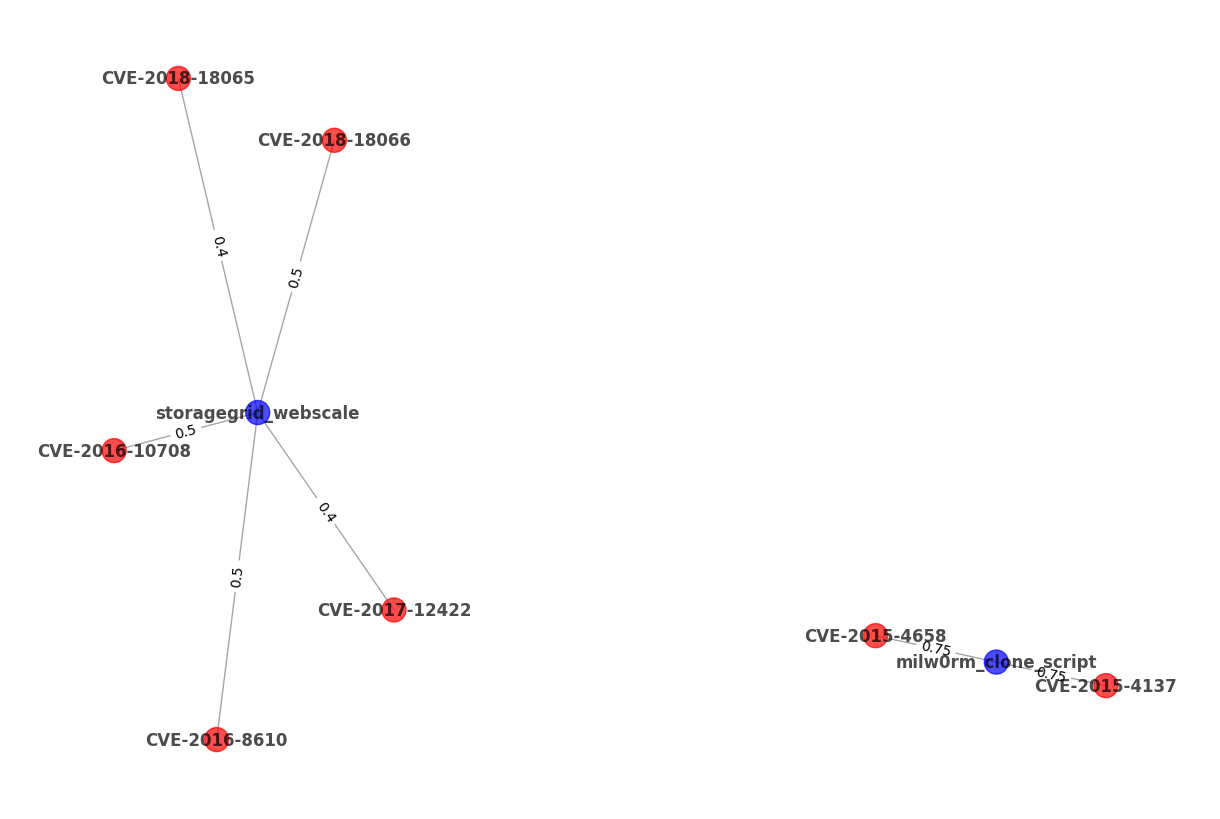

In [ ]:
sample_graph = nx.Graph()
for _, row in random_products.iterrows():
    product = row['vulnerable_product']
    cve_list = row['cve_id']
    risk_list = row['risk_probability']
    sample_graph.add_node(product, node_type='Product')
    # Add nodes and edges for each CVE in the cve_list
    for cve, risk_prob in zip(cve_list, risk_list):
        sample_graph.add_node(cve, node_type='CVE')
        sample_graph.add_edge(product, cve, weight=risk_prob)

# Visualize the graph
# pos = nx.spring_layout(attack_graph)
# nx.draw(attack_graph, pos, with_labels=True, font_weight='bold')
# plt.show()
# Define a color map for node types
node_color_map = {'Product': 'blue', 'CVE': 'red'}

# Visualize the graph with customized parameters
pos = nx.spring_layout(sample_graph, seed=42)
node_color = [node_color_map[node_type] for node_type in nx.get_node_attributes(sample_graph, 'node_type').values()]
edge_color = 'gray'

plt.figure(figsize=(12, 8))
nx.draw(sample_graph, pos, with_labels=True, font_weight='bold', node_size=300, node_color=node_color, edge_color=edge_color, alpha=0.7)
edge_labels = nx.get_edge_attributes(sample_graph, 'weight')
nx.draw_networkx_edge_labels(sample_graph, pos, edge_labels=edge_labels)
plt.show()

In [ ]:
attack_graphs = []

for _, row in group_data.iterrows():
    product = row['vulnerable_product']
    cve_list = row['cve_id']
    risk_list = row['risk_probability']
    attack_graph = nx.Graph()
    attack_graph.add_node(product, node_type='Product')
    # Add nodes and edges for each CVE in the cve_list
    for cve, risk_prob in zip(cve_list, risk_list):
        attack_graph.add_node(cve, node_type='CVE')
        attack_graph.add_edge(product, cve, weight=risk_prob)
    attack_graphs.append(attack_graph)
print(len(attack_graphs))

38746


In [ ]:
# risk_probability_value = cves[cves['cve_id'] == 'CVE-2016-0363']['risk_probability'].values[0]
# print(risk_probability_value)

0.6799999999999999


Calculate risk probability of attack for each product

In [ ]:
product_risk_level = {}

for attack_graph in attack_graphs:
  product_nodes = [node for node, data in attack_graph.nodes(data=True) if data.get('node_type') == 'Product']
  # print(product_nodes)

  for product_node in product_nodes:
    neighbors = attack_graph.neighbors(product_node)
    cve_nodes = [neighbor for neighbor in neighbors if attack_graph.nodes[neighbor]['node_type'] == 'CVE']
    # print(cve_nodes)
    risk_prob = [attack_graph[product_node][cve_node]['weight'] for cve_node in cve_nodes]
    # print(risk_prob)

    product_not_risk_probability = 1.0
    for prob in risk_prob:
      product_not_risk_probability *= (1 - prob)
    product_risk_probability = 1 - product_not_risk_probability

    product_risk_level[product_node] = product_risk_probability
# print(product_risk_level)

Label base on risk level

In [ ]:
labels = []
for product_node, product_risk_prob in product_risk_level.items():
  if product_risk_prob < 0.4:
    labels.append('low')
  elif 0.4 <= product_risk_prob < 0.7:
    labels.append('medium')
  else:
    labels.append('high')
# print(labels)
group_data['risk_level'] = group_data['vulnerable_product'].map(dict(zip(product_risk_level.keys(), labels)))
group_data

,vulnerable_product,cve_id,risk_probability,risk_level
0,-,"[CVE-2017-13097, CVE-2017-13096, CVE-2017-1309...","[0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.21]",high
1,-5120-24g-poe\+_\(370w\)_si_switch,[CVE-2012-3268],[0.85],high
2,-ma5200g,[CVE-2012-3268],[0.85],high
3,.net_agent,[CVE-2017-9246],[0.75],high
4,.net_communication_protocol_components,"[CVE-2013-2794, CVE-2013-2793]","[0.49, 0.78]",high
...,...,...,...,...
38741,zzcms,"[CVE-2018-17798, CVE-2019-1010149, CVE-2019-10...","[0.55, 0.75, 0.75, 0.75, 0.75, 0.75, 0.43, 0.6...",high
38742,zziplib,"[CVE-2018-7727, CVE-2018-6869, CVE-2018-16548,...","[0.43, 0.43, 0.43, 0.43, 0.43, 0.43, 0.43, 0.5...",high
38743,zzmcms,[CVE-2019-1010151],[0.75],high
38744,zzzphp,"[CVE-2019-17408, CVE-2019-16720, CVE-2019-1672...","[0.75, 0.5, 0.75, 0.75, 1.0, 0.65, 0.68]",high


In [ ]:
fig1 = px.histogram(group_data,x='risk_level')
fig1.show()

In [ ]:
# Convert risk levels to numerical labels
label_encoder = LabelEncoder()
group_data['risk_level_label'] = label_encoder.fit_transform(group_data['risk_level'])
group_data


,vulnerable_product,cve_id,risk_probability,risk_level,risk_level_label
0,-,"[CVE-2017-13097, CVE-2017-13096, CVE-2017-1309...","[0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.46, 0.21]",high,0
1,-5120-24g-poe\+_\(370w\)_si_switch,[CVE-2012-3268],[0.85],high,0
2,-ma5200g,[CVE-2012-3268],[0.85],high,0
3,.net_agent,[CVE-2017-9246],[0.75],high,0
4,.net_communication_protocol_components,"[CVE-2013-2794, CVE-2013-2793]","[0.49, 0.78]",high,0
...,...,...,...,...,...
38741,zzcms,"[CVE-2018-17798, CVE-2019-1010149, CVE-2019-10...","[0.55, 0.75, 0.75, 0.75, 0.75, 0.75, 0.43, 0.6...",high,0
38742,zziplib,"[CVE-2018-7727, CVE-2018-6869, CVE-2018-16548,...","[0.43, 0.43, 0.43, 0.43, 0.43, 0.43, 0.43, 0.5...",high,0
38743,zzmcms,[CVE-2019-1010151],[0.75],high,0
38744,zzzphp,"[CVE-2019-17408, CVE-2019-16720, CVE-2019-1672...","[0.75, 0.5, 0.75, 0.75, 1.0, 0.65, 0.68]",high,0


In [ ]:
X = group_data['cve_id']
X
y = group_data['risk_level_label']

Biểu diễn vulnerable_product_name bằng TF-IDF

In [ ]:
# Biểu diễn vulnerable_product_name bằng TF-IDF
# vectorizer = TfidfVectorizer()
# vulnerable_product_names_tfidf = vectorizer.fit_transform(vulnerable_product_names)
# print(vulnerable_product_names_tfidf)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Tokenize CVEs and convert to sequences
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to have the same length
max_sequence_length = max(max(len(seq) for seq in X_train_seq), max(len(seq) for seq in X_test_seq))
X_train_padded = keras.preprocessing.sequence.pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_padded = keras.preprocessing.sequence.pad_sequences(X_test_seq, maxlen=max_sequence_length)

In [ ]:
# Define the model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=50, input_length=max_sequence_length))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))  # Output layer with 3 units for 'low', 'medium', 'high' risk levels


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
model.fit(X_train_padded, y_train, epochs=2, batch_size=32, validation_data=(X_test_padded, y_test))

Epoch 1/2
969/969 [==============================] - 252s 259ms/step - loss: 0.6772 - accuracy: 0.6687 - val_loss: 0.6636 - val_accuracy: 0.6507
Epoch 2/2
969/969 [==============================] - 236s 244ms/step - loss: 0.1661 - accuracy: 0.9572 - val_loss: 0.6163 - val_accuracy: 0.6750


In [ ]:
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

243/243 [==============================] - 6s 23ms/step - loss: 0.6163 - accuracy: 0.6750
Test Accuracy: 67.50%
